<div class="alert alert-block alert-info" style="background-color: #323031; color:#ffffff; width:90%; padding:50px; -webkit-border-radius:5px">

# Python Data Visualization 1: Line plots

The Python Data Visualization series teaches you how to use the most popular libraries to generate visualizations in Python. After having completed this series, you will be able to create and customize line, scatter, bar plots and histograms with matplotlib. You will also learn how to create visualizations with pandas and seaborn. Matplotlib is the original library written in Python for data visualization and seaborn and pandas plotting capabilities depend on matplotlib. While matplotlib is very powerful, it often requires more code to create visually pleasing and effective plots compared to seaborn or pandas.

Matplotlib is the most popular library to generate plots in Python. It allows you to plot basically any type of plot. Although creating more complex plots, can be challenging, it isn't difficult to find useful help online. Since pandas and seaborn, which provide more user-friendly ways to create plots in Python, are based on matplotlib, it is important to first understand how to create and customize plots with matplotlib.

In this session you will learn how to create line plots to visualize the change of a quantitative variable, e.g. stock prices or economic variables over time.


<b>You will learn about</b>:
- Downloading stock and economic data with pandas-datareader
- Using matplotlib to plot stock/economical data with line plots
- Customizing lines and plots
- Combining multiple stock data series in a line plot

<div class="alert alert-block alert-info" style="background-color: #f2f2f2; color:#3F3F3F;width:90%; padding:50px; -webkit-border-radius:5px">

<h3>More information on how the session is run</h3>

<b>How to work together</b>: 
<ul>
            <li>Plesase turn on your microphone and webcam.</li>
            <li>One shares the screen and the other requests remote control. </li>
            <li>Take turns on who types for each exercise.</li>
        </ul>
<b>What to do when getting stuck</b>:
    <ol>
        <li>Search online:</li>
        <ol>
            <li>The answer box on the top of Google's results page</li>
            <li><a href="https://www.stackoverflow.com">stackoverflow.com</a> (task-specific solutions)</li>
            <li><a href="https://www.w3schools.com">w3schools.com</a> (basic python questions)</li>
            <li><a href="https://www.realpython.com">realpython.com</a> (topic-based tutorials)</li>
        </ol>
        <li>Ask the trainer if you struggle to find a solution.</li>
    </ol>

</div>

<br>

### Downloading Federal Reserve Economic Data with pandas-datareader

We are going to use the pandas-datareader library throughout this session to download data from different sources to generate plots from.

The pandas-datareader package enables us to download financial and economic data from various sources. The Federal Reserve Economic Data (FRED) is one avaiable source to retrieve a multitude of economic time series for the US economy. You can check out the [pandas-datareader website](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for an overview of all available sources and examples of how to download data.

Conda does not come with pandas-datareader preinstalled. You can install it with `conda install pandas-datareader` if you are using your personal laptop/PC.

We first import the data module from the pandas_datareader library under the alias `web`. 

We then download the payroll data from FRED. The DataReader function requires 4 arguments.
1. The symbol for the type of data we want to download. The payroll data uses the symbol `'PAYEMS'`.
2. The source, which is ``fred``. Later we will use `'yahoo'` in order to download stock price data.
3. The start date, `'2006-09-01'`
4. The end date, `'2021-09-01'`

In [1]:
import pandas_datareader.data as web

payems = web.DataReader('PAYEMS', 'fred', '2006-09-01', '2021-09-01')

The **payems** dataframe contains monthly data for Sept 2006 - August 2021.

In [2]:
payems

PAYEMS
DATE              
2006-09-01  136843
2006-10-01  136852
2006-11-01  137063
2006-12-01  137249
2007-01-01  137477
...            ...
2021-05-01  145141
2021-06-01  145698
2021-07-01  146387
2021-08-01  146904
2021-09-01  147328

[181 rows x 1 columns]

As it only contains one column, let us reassign the `payems` variable to the `PAYEMS` column.

In [3]:
payems = payems['PAYEMS']

As you might have noticed, the data are not expressed as total values, but in thousands. We will multiply all entries by 1000 to reflect the correct values.

In [4]:
payems *= 1000
payems.head()

DATE
2006-09-01    136843000
2006-10-01    136852000
2006-11-01    137063000
2006-12-01    137249000
2007-01-01    137477000
Name: PAYEMS, dtype: int64

<br>

### Creating a line plot

We are going to use the **matplotlib** library to plot the Payrolls data as a function of time. 

We import the `pyplot` module from `matplotlib` under the name `plt`.

From the `plt` module we call the `plot()` function and we pass as arguments the `index` and the `payems` series as such, which will retrieve the actual values. The values for the x and y axis are positional arguments, which means they have to be passed in this order and cannot be passed by using parameter names.

The `plt.show()` command is used to display matplotlib figures. It is actually not necessary to run the plt.show() command in a Jupyter notebook to display the figures, but you would have to use it to display a plot in a normal Python script.

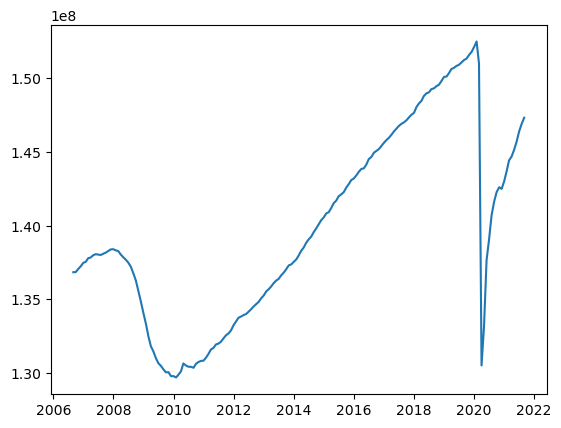

In [38]:
import matplotlib.pyplot as plt

plt.plot(payems.index, payems)
plt.show()

The 1e8 on top of the y-axis indicates that the numbers have to be multiplied by 100 million in order to reflect the actual values. 1e8 stands for 10^8. Displaying large numbers in that way is called scientific notation. 

We can print out the value that is represented by 1e8 to verify that.


In [39]:
print(1e8)

100000000.0


Using e8 is identical to using * 10**8. The first one looks fancier though.

In [40]:
print(1.3e8)
print(1.3 * 10**8)

130000000.0
130000000.0


Let us now add a chart title and y-axis label to better describe the data. We use the `plt.title()` function to add a chart title, 

In order to clarify that the numbers on the y-axis represent 100 millions, we define the y-axis label `'Employees [100 Million]'` with the `plt.ylabel()` function.

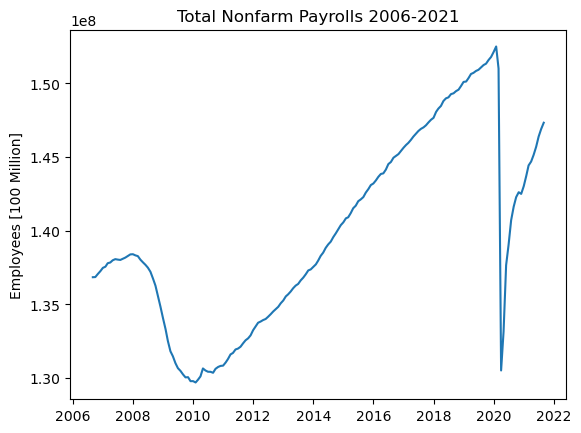

In [41]:
plt.plot(payems.index, payems)
plt.title('Total Nonfarm Payrolls 2006-2021')
plt.ylabel('Employees [100 Million]')
plt.show()

When using time series data, where the index is a date-time index, we do not have to pass the index as the first argument to be plotted on the x-axis. The `plt.plot()` function by default searches for date-time values in the index to be plotted on the x-axis. 

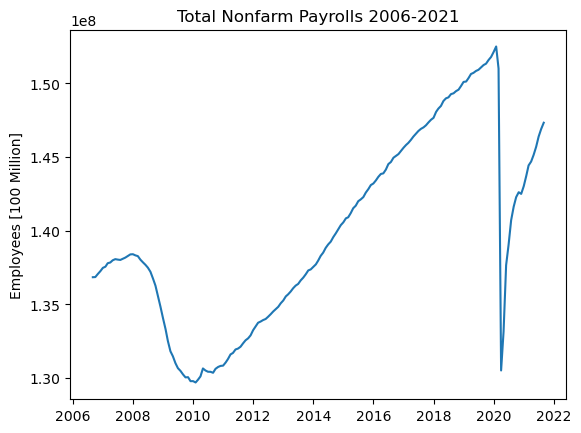

In [42]:
plt.plot(payems)
plt.title('Total Nonfarm Payrolls 2006-2021')
plt.ylabel('Employees [100 Million]')
plt.show()

<br>

### Task 1: Unemployment rate

- Import the data module from pandas-datareader under the alias web
- Import matplotlib
- Import the unemployment rate data from the `'fred'`, use the symbol `'UNRATE'` from the last 16 years
- Create a line plot
- Add a chart title and y-axis label

<br>

### Changing values on the x or y-axis: Ticks and labels

An axis in matplotlib plot consists of <span style="color:#C36DE9"><b>labels</b></span> and <span style="color:#EC7320"><b>ticks</b></span>. The <span style="color:#EC7320"><b>ticks</b></span> are the positions on the axis where to place the <span style="color:#C36DE9"><b>labels</b></span>.

As you have seen from our previous plots, matplotlib chooses the minimum and maximum values and the steps between numbers on both the x- and y-axis for us. We can use the `plt.xticks()` and `plt.yticks()` functions to change where on the x- and y-axis numbers should appear and which value should be displayed.





<img src="https://www.dropbox.com/s/cw23hc7eh3onfui/python_plotting_1_1.png?raw=1" width="400px">

Below we create a list for the <span style="color:#EC7320"><b>ticks</b></span> on the y-axis, that is, the position where on the y-axis we want to place numbers. This list only has one value. If we pass this list to the `plt.yticks()` function, the y-axis only will display the number `1.30e8`/130 million.

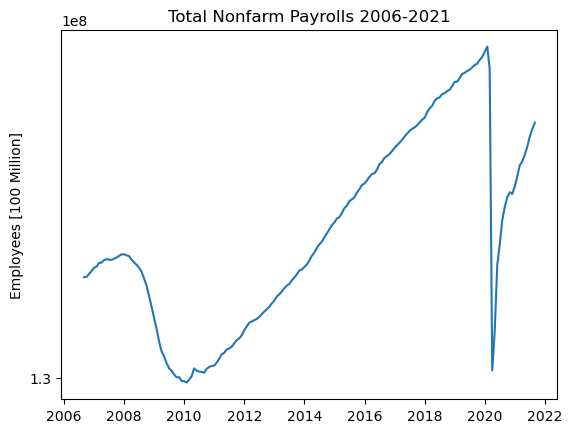

In [44]:
plt.plot(payems)
plt.title('Total Nonfarm Payrolls 2006-2021')
plt.ylabel('Employees [100 Million]')

yticks = [1.30e8]
plt.yticks(yticks)

plt.show()

We add a second number, `1.50e8`/150 million, to the **yticks** list and matplotlib will create another <span style="color:#EC7320"><b>tick</b></span> on the y-axis at the corresponding position. Since we do not provide a label for these two <span style="color:#EC7320"><b>ticks</b></span>, matplotlib will simply display the numerical value.

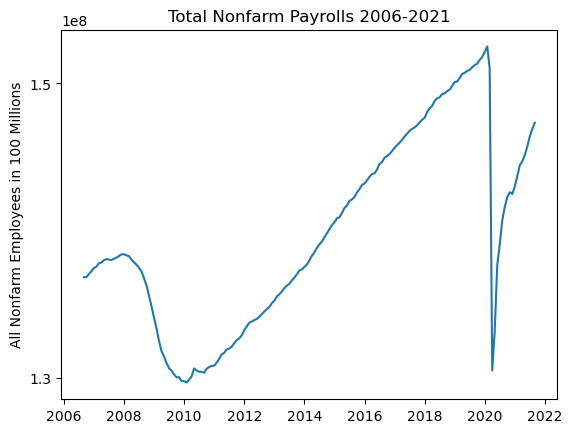

In [45]:
plt.plot(payems)
plt.title('Total Nonfarm Payrolls 2006-2021')
plt.ylabel('All Nonfarm Employees in 100 Millions')

yticks = [1.30e8, 1.50e8]
plt.yticks(yticks)

plt.show()

In order to display the numbers as hundreds, which makes them easier to read, we can create a second list for the <span style="color:#C36DE9"><b>labels</b></span> and pass this as the second argument to the `plt.yticks()` function. 

The chart now displays the values we specified with the **ylabels** list at the positions defined in the **yticks** list.

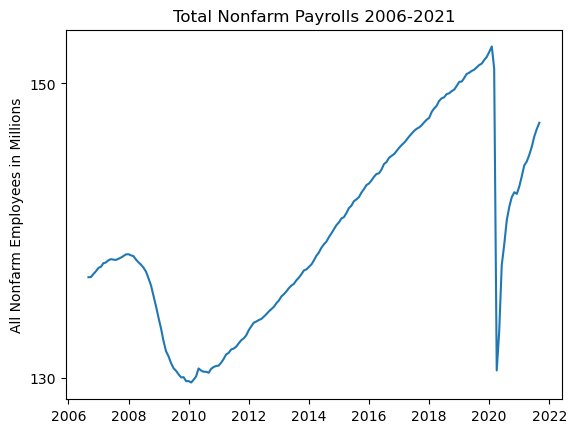

In [46]:
plt.plot(payems)
plt.title('Total Nonfarm Payrolls 2006-2021')
plt.ylabel('All Nonfarm Employees in Millions')

yticks = [1.30e8, 1.50e8]
ylabels = [130, 150]
plt.yticks(yticks, ylabels)

plt.show()

Below you can see what the plot looks like when having added all ticks and labels to the two lists.

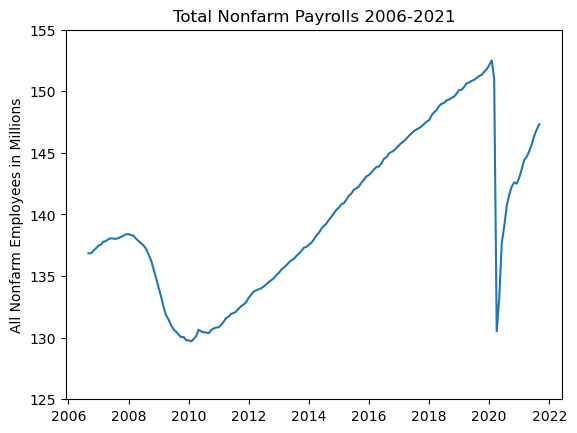

In [47]:
plt.plot(payems)
plt.title('Total Nonfarm Payrolls 2006-2021')
plt.ylabel('All Nonfarm Employees in Millions')

yticks = [1.25e8, 1.30e8, 1.35e8, 1.40e8, 1.45e8, 1.50e8, 1.55e8]
ylabels = [125, 130, 135, 140, 145, 150, 155]

plt.yticks(yticks, ylabels)

plt.show()

A more efficient way to generate the ticks and labels is to use a numpy range.

With `np.arange()` we can specify the start, stop and step values. This si similar to the built-in `range()` function, but `range()` only allows integers, whereas `np.arange()` allows both integer and float.

In [52]:
import numpy as np

yticks = np.arange(1.25e8, 1.55e8+1, .05e8)
ylabels = np.arange(125, 155+1, 5)

print(yticks)
print(ylabels)

[1.25e+08 1.30e+08 1.35e+08 1.40e+08 1.45e+08 1.50e+08 1.55e+08]
[125 130 135 140 145 150 155]


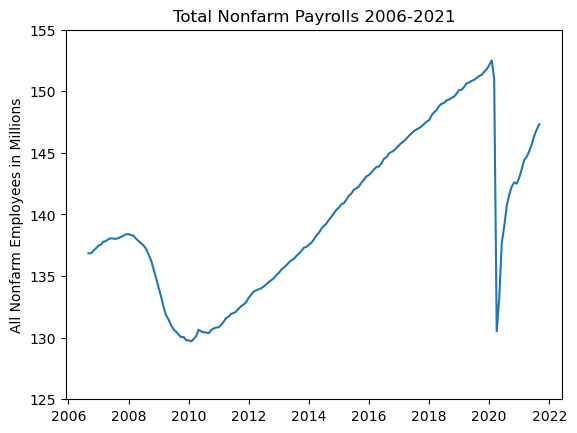

In [53]:
plt.plot(payems)
plt.title('Total Nonfarm Payrolls 2006-2021')
plt.ylabel('All Nonfarm Employees in Millions')

yticks = np.arange(1.25e8, 1.55e8+1, .05e8)
ylabels = np.arange(125, 155+1, 5)

plt.yticks(yticks, ylabels)

plt.show()

<br>

### Task 2: Changing the y-ticks and labels

1. Download the revenue passenger miles from the FRED using the symbol `'RPM'` from 2000 till today. The revenue passenger mile (RPM) is a transportation industry metric that shows the number of miles traveled by paying passengers.
2. Display the first five rows of the dataset. The values are expressed in thousands. Re-assign the rpm variable to the RPM column from the dataframe. Multiply all values by 1000 to represent the actual values. Display the first five rows again. What is the most meaningful way to express the numbers? Thousands, millions or billions? Keep this in mind for updating the ticks and labels for the y-axis in step 5.
3. Plot the data as a line plot.
4. Add the title `'US Revenue Passenger Miles 2000-2022'`
5. Change the y-axis ticks and labels to make the values easier to read.

<br>

### Multiple lines, legend and line customization

In the next example, we are going to download the sp500 stock data, a stock index tracking the 500 largest US companies and plot the price with the stock price of Tesla and Exxon Mobile in the same chart.

We first download the data for the SP500, Tesla and Exxon Moble from yahoo finance.

To download data from yahoo finance, we need to supply the stock symbol, the source, which is `'yahoo'` and a start date. The symbols are `'SPY'`, `'TSLA'` and `'XOM'`. By only using a start date, we get the data up to today.

In case the code returns the error message `TypeError: string indices must be integers`, skip to the next cell where we explain how to download the data using a different library.

In [54]:
sp500 = web.DataReader('SPY', 'yahoo', '2010-01-01')
tesla = web.DataReader('TSLA', 'yahoo', '2010-01-01')
xom = web.DataReader('XOM', 'yahoo', '2010-01-01')


TypeError: string indices must be integers

As an alternative, we can use the yfinance library to download the data. We need to install yfinance with `pip install yfinance`.

In [91]:
pip install yfinance

We can now use the `download()` function from the `yfinance` library to download historic stock price data.

The first value is the stock symbol, followed by the starting date.

In [92]:
import yfinance as yf

sp500 = yf.download('SPY', 2010)
tesla = yf.download('TSLA', 2010)
xom = yf.download('XOM', 2010)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


This returns a dataframe for each stock with several columns. We are only interested in the **Adj Close** column - the Closing price corrected for anything that might affect the price after the market has closed. 

In [93]:
sp500.head()

Open      High       Low     Close  Adj Close   Volume
Date                                                                  
1993-01-29  43.96875  43.96875  43.75000  43.93750  25.218231  1003200
1993-02-01  43.96875  44.25000  43.96875  44.25000  25.397589   480500
1993-02-02  44.21875  44.37500  44.12500  44.34375  25.451399   201300
1993-02-03  44.40625  44.84375  44.37500  44.81250  25.720432   529400
1993-02-04  44.96875  45.09375  44.46875  45.00000  25.828047   531500

We can plot all stocks in the same chart, by calling the `plt.plot()` function for each of the stocks on the **Adj Close** column.

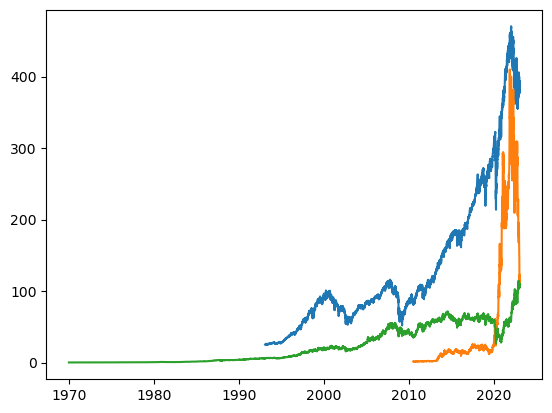

In [94]:
plt.plot(sp500['Adj Close'])
plt.plot(tesla['Adj Close'])
plt.plot(xom['Adj Close'])

plt.show()

In order to add a legend to the plot, we need to pass a value for the `label` parameter for each data series and then call the `plt.legend()` function.


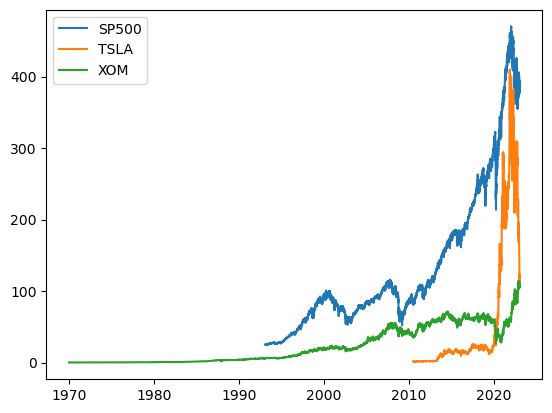

In [95]:
plt.plot(sp500['Adj Close'], label='SP500')
plt.plot(tesla['Adj Close'], label='TSLA')
plt.plot(xom['Adj Close'], label='XOM')

plt.legend()

plt.show()

Let's look at some of the ways we can customize the appearance of the lines. For instance, we can change the colour, linewidth and transparency with the `color`, `linewidth` and `alpha` parameters.


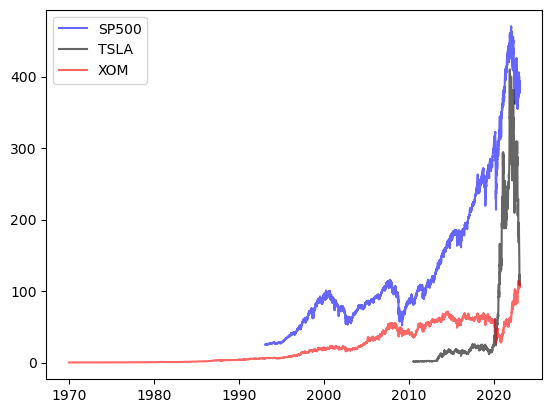

In [96]:
plt.plot(sp500['Adj Close'], label='SP500', color='blue', alpha=.6, linewidth=1.5)
plt.plot(tesla['Adj Close'], label='TSLA', color='black', alpha=.6, linewidth=1.5)
plt.plot(xom['Adj Close'], label='XOM', color='red', alpha=.6, linewidth=1.5)

plt.legend()
plt.show()

<br>

### Task 3: Plots with multiple lines

Import the oecd unemployment data using the below code. The dates are stored in the index. The location and value column represent the country/location and unemployment rate. 

We use the `parse_dates` and `index_col` parameters in order to select the **time** column as the index and parse the values as dates in order to create a date-time index. Using a date-time index will enable matplotlib to properly format the date values on the x-axis.

In [6]:
import pandas as pd

unrate = pd.read_csv("https://raw.githubusercontent.com/mwiemers/datasets/main/oecd_unrate.csv", parse_dates=True, index_col='time')

unrate.head()

location  value
time                      
1967-01-01      AUS  1.875
1968-01-01      AUS  1.850
1969-01-01      AUS  1.800
1970-01-01      AUS  1.625
1971-01-01      AUS  1.925

Complete the below code cell in order to generate a plot like below, where the unemployment rate for each country is plotted with a separate line. 
- Plot the lines for the location USA, EU, Japan and OECD with a linewidth of 1.5. 
- Plot the lines for the remaining countries in grey and with a linewidth of 0.5 and an alpha value of .8
- Add the same chart title and y-axis label

<img src="https://www.dropbox.com/s/niz7bc45eqesq9x/oecd_unrate.png?raw=1" width="400px">

In [7]:
import matplotlib.pyplot as plt

for country in unrate['location'].unique():
    # create a subset for the data from select country
    country_df = 
    # add if statement to plot the value column from the country_df dataframe in gray or with a colour 
    # depending on the country that is being selected
    if 
        plt.plot(country_df['value'], label=country)
    else:
        plt.plot(country_df['value'], color='gray', alpha=.2)
         

plt.title('OECD - Unemployment Rates')
plt.ylabel('Percent')        
plt.legend()

plt.show()


<br>

### Task 4: Adding a grid

1. Turn the code from the previous task into a function that takes as argument the dataset on which to perform the plot. Call the function `oecd_plot` and name the paramter inside the function `df`.
2. Create a subset of the unrate data for data from 2000 onwards. Use the oecd_plot function to create the same plot as in the previous task, but this time only for the data from 2000 onwards.
3. Update the function to add a grid to your plot that uses dashed lines in black with an alpha of .5

<div class="alert alert-block alert-info" style="background-color:#ECECEB; color:#3F3F3F; width:90%; padding:50px; -webkit-border-radius:5px">

### Final task: Please give us your feedback!

Upon completing the survey, **you will receive the link to the solution file**, to check how your code compares to the sample solution.

In order to adapt our training to your needs and provide the most valuable learning experience for you, we depend on your feedack.

We would be grateful if you could take **1 min** before the end of the workshop to get your feedback! 

<a href="https://lse.eu.qualtrics.com/jfe/formSV_6eSrOVWuit28qcS?coursename=Python Data Visualization 1: Line Plots with Matplotlib  &topic=Python&link=https://lsecloud-my.sharepoint.com/:u:/g/personal/m_wiemers_lse_ac_uk/ERsXvtzh0pdNnzKtTbFxBiUBAeIjY7x-8rdH83jNakFnpA?e=VHaMHD&prog=DS&version=23-24&link2="><b>Click here to open the survey!</b></a>


</div>

### Bonus task: CO 2 Emissions

1. Use the dictioary to download and plot the data series on US CO2 emission from different sectors. When looping over a dictionary you will select the keys per default. You can then use the keys to select the symbols to download the data from red.stlouisfed.org using `'fred'` as source with the `DataReader` function as before. Make sure to download the data from 1970 onwards.
2. Use the for loop to download and immediately plot the data as lines.
3. After the for loop add a title ('CO 2 Emissions'), y-axis label ('Million Metric Tons').
4. Add a grid.
5. Add a legend.

In [1]:
import matplotlib.pyplot as plt

co2_symbols = {
    'transport': 'EMISSCO2TOTVTCTOUSA',
    'coal_industrial': 'EMISSCO2TOTVICCOA',
    'electric_power': 'EMISSCO2TOTVECTOUSA',
    'jet_fuel': 'EMISSCO2VJFACBA',
    'residential': 'EMISSCO2TOTVRCTOUSA'
}

